In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('Combined_Jobs_Final.csv')
df.head(3)

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.0,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.0,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.0,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC


In [3]:
print(len(df))
df = df[['Status', 'Title', 'Position', 'Company', 'Job.Description']]
print(len(df))


84090
84090


In [4]:
df.shape

(84090, 5)

In [5]:
df['Job.Description'][20]

'Hiring Event Details\r\nStore Associate\r\n\r\n$12.00 / Hour\r\nAdditional $1.00 Per Hour For ALL Sunday Shifts!\r\n50 Cent Wage Increases Beginning At 6 Months - Up to $13.50 At 2 Years\r\n\r\nMonday, December 15, 2014\r\n9am - 11am\r\n\r\nALDI\r\n3133 Market Place Dr\r\nOnalaska, WI 54650\r\n\r\n&nbsp;\r\nFor consideration, please apply in person at the hiring event only. Get started now by downloading our Store Employment Application.\r\n\r\nStore Associate - Retail Sales ( Customer Service )\r\n\r\nIf you are a customer service minded individual with a positive and energetic personality and you&rsquo;re interested in working for one of the best-known grocery stores in the nation, join the ALDI family! We are looking for motivated and reliable individuals to serve as a Store Associate. You will serve as the face of ALDI, providing customers with friendly and efficient check-out services. But that&rsquo;s just the beginning. You will also assist the store manager in a variety of rol

In [6]:
df.isnull().sum()
df.fillna('',inplace=True)
df.isnull().sum()

Status             0
Title              0
Position           0
Company            0
Job.Description    0
dtype: int64

In [7]:
df = df.sample(n=1000,random_state=42)

In [8]:
df.shape

(1000, 5)

In [9]:

from nltk.corpus import stopwords
import nltk
import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [10]:
def cleaning(txt):

    txt = re.sub(r'[^a-zA-Z0-9\s]','',txt)

    tokens = nltk.word_tokenize(txt.lower())
    
    stemming = [ps.stem(w) for w in tokens if w not in stopwords.words('english')]
    return " ".join(stemming)

In [11]:

cleaning("\n\rhelo the master piece is my loving moving cat @9032#%$")

'helo master piec love move cat 9032'

In [12]:
df['Job.Description'] = df['Job.Description'].astype(str).apply(lambda x: cleaning(x))
df['Title'] = df['Title'].astype(str).apply(lambda x: cleaning(x))
df['Position'] = df['Position'].astype(str).apply(lambda x: cleaning(x))

In [13]:
df['clean_text'] = df['Job.Description']+" "+df['Title']+df['Position']

In [14]:
df['clean_text'][64119]

'job summari knowledg univers ku site director site leader inspir children teacher alik learn grow passion educ excel confid teach children adult use nation recogn curriculum framework creat uniqu engag classroom experi commit make site success know meaning relationship children famili team import success fulli engag enthusiast work eager share knowledg other job respons essenti function basic expect site director cours creativ new way meet exceed expect encourag long requir essenti function also met supervis children staff record keep licens record child file lesson plan implement mainten safe welcom classroom environ build relationship commun school recruit new student program applic must strong organiz skill site director knowledg universsite director'

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [16]:
tfidf = TfidfVectorizer(stop_words='english')
matrix = tfidf.fit_transform(df['clean_text'])
similarity = cosine_similarity(matrix)

In [17]:
similarity

array([[1.        , 0.04322045, 0.02131549, ..., 0.05101897, 0.02496253,
        0.08044478],
       [0.04322045, 1.        , 0.02936862, ..., 0.03617188, 0.00565445,
        0.02613043],
       [0.02131549, 0.02936862, 1.        , ..., 0.05498817, 0.02959363,
        0.04218737],
       ...,
       [0.05101897, 0.03617188, 0.05498817, ..., 1.        , 0.05915732,
        0.11128466],
       [0.02496253, 0.00565445, 0.02959363, ..., 0.05915732, 1.        ,
        0.38569354],
       [0.08044478, 0.02613043, 0.04218737, ..., 0.11128466, 0.38569354,
        1.        ]])

In [18]:
sorted(list(enumerate(similarity[0])), key=lambda x: x[1], reverse=True)[1:20]

[(276, np.float64(0.973377286887309)),
 (730, np.float64(0.5181424118134748)),
 (81, np.float64(0.4930629206360942)),
 (917, np.float64(0.4930629206360942)),
 (252, np.float64(0.25858111531722167)),
 (128, np.float64(0.24712958824951997)),
 (360, np.float64(0.23664048105861932)),
 (825, np.float64(0.2187064171642548)),
 (629, np.float64(0.20888815693890722)),
 (38, np.float64(0.18257068622788103)),
 (245, np.float64(0.17963803184545252)),
 (114, np.float64(0.1726310855323128)),
 (254, np.float64(0.16811344897738498)),
 (298, np.float64(0.14465727323705424)),
 (59, np.float64(0.14241842988596462)),
 (940, np.float64(0.13972634715716167)),
 (195, np.float64(0.13687145455860786)),
 (284, np.float64(0.13625519998756502)),
 (965, np.float64(0.13588092414113373))]

In [19]:
X = df.iloc[:, [2,4]].values


In [20]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
# Select relevant columns
data_subset = df[['Position', 'Job.Description']].dropna()

# Encode the 'Position' column to numerical values
label_encoder = LabelEncoder()
position_encoded = label_encoder.fit_transform(data_subset['Position'])

# Vectorize the 'Job.Description' column using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 features for simplicity
job_description_tfidf = tfidf_vectorizer.fit_transform(data_subset['Job.Description'])

# Combine the position and job description features into a single feature set
combined_features = np.hstack((position_encoded.reshape(-1, 1), job_description_tfidf.toarray()))

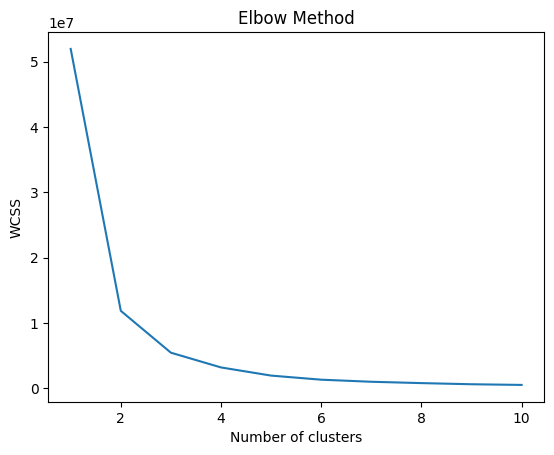

In [21]:
# Perform the elbow method to determine the optimal number of clusters
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(combined_features)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


C:\Users\driya\AppData\Local\Temp\ipykernel_21316\2787254634.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


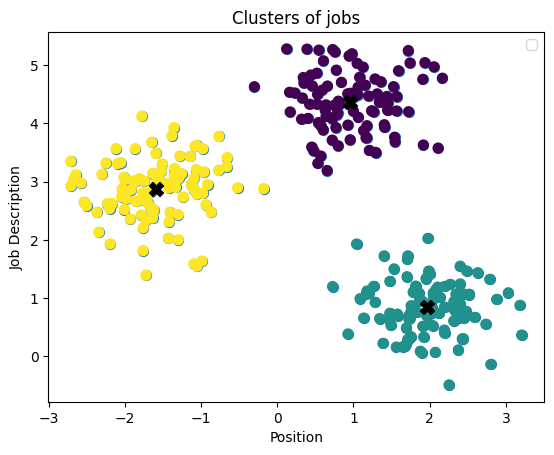

In [22]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=3,
cluster_std=0.50, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random', max_iter=10)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X')
plt.title('Clusters of jobs')
plt.xlabel("Position")
plt.ylabel("Job Description")
plt.legend()
plt.show()

In [23]:
kmeansmodel = KMeans(n_clusters=3, init='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(X)

In [24]:
def recommend(title):

        indx = df[df['Title'] == title].index[0]
        indx = df.index.get_loc(indx)
        distances = sorted(list(enumerate(similarity[indx])), key=lambda x: x[1], reverse=True)[1:20]

        jobs = []
        for i in distances:
            jobs.append(df.iloc[i[0]].Title)
        return jobs

In [25]:
recommend('site director knowledg univers')

['site director knowledg univers educ llc',
 'teacher knowledg univers',
 'assist teacher knowledg univers',
 'assist teacher knowledg univers',
 'cook knowledg univers',
 'immedi open assist teacher la petit academi',
 'summer school age assist children courtyard',
 'hvac instructor vatterott educ center',
 'temporari coordin site oper macyscom maci',
 'fellowship program coordin connecticut children medic center',
 'medic offic assist instructor concord career colleg inc',
 'youth camp residenti assist activ coordin new york ny el educ servic',
 'pharmaci adjunct instructor brown macki colleg',
 'secur offic regular securita usa',
 'secur offic 100000 job coalit securita usa',
 'school day camp counselor ii ymca greenvil',
 'faculti call zenith educ group',
 'faculti support specialist zenith educ group',
 'handbag sell specialist part time bloomingdal chevi chase md bloomingdal']

In [26]:
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))

In [27]:
import pandas as pd
print(pd.__version__)

2.2.2
